# Exercício sobre regressão de preços de residências usando redes neurais densas (DNNs)

Neste exercício, você irá treinar a mesma rede neural do exemplo visto em sala de aula.

Entretanto, nenhum escalonamento (padronização ou normalização) será aplicado aos atributos.

**Execute todas as células de código abaixo, analise e compare os resultados com aqueles obtidos no exemplo visto em sala de aula e, ao final, conclua se o escalonamento é benéfico ou não? Ou seja, vale a pena escalonar?** (**Justifique sua resposta**).

## Importando as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Baixando a base de dados

Neste exercício, utilizaremos uma rede neural para aproximar o conjunto de dados do Boston Housing e predizer o custo médio de uma casa em uma área de Boston.

**Objetivo**

O objetivo é treinar um modelo de regressão que prediga o valor médio das casas naquela área usando os 13 atributos fornecidos.

**Observação**

Por padrão, a função `load_data` divide o conjunto total de exemplos em 80% para treinamento e 20% para testes.

In [ ]:
data = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = data.load_data()

## Definindo o modelo

In [ ]:
input_shape = x_train.shape[1]

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(20, input_shape=[input_shape], activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Compilando o modelo

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'] # métrica usada para monitorar as etapas de treinamento e teste.
)

## Treinando o modelo


In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
)

Epoch 1/1000
13/13 [==============================] - 2s 11ms/step - loss: 436.9659 - mae: 16.3482
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 195.5266 - mae: 10.7072
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 131.4988 - mae: 9.4115
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 103.9060 - mae: 7.6947
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 94.7894 - mae: 7.4641
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 87.9171 - mae: 6.9579
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 83.0263 - mae: 6.8258
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 78.3290 - mae: 6.5053
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 75.4799 - mae: 6.3862
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 73.2459 - mae: 6.2610
Epoch 11/1000
13/13 [===========

### Avaliando o modelo treinado no conjunto de treinamento

In [ ]:
train_eval = model.evaluate(x_train, y_train)

print ("MSE no conjunto de treinamento: {:.5}".format(train_eval[0]))
print ("MAE no conjunto de treinamento: {:.5}".format(train_eval[1]))

13/13 [==============================] - 0s 3ms/step - loss: 21.8276 - mae: 3.2680
MSE no conjunto de treinamento: 21.828
MAE no conjunto de treinamento: 3.268


### Plotando os erros

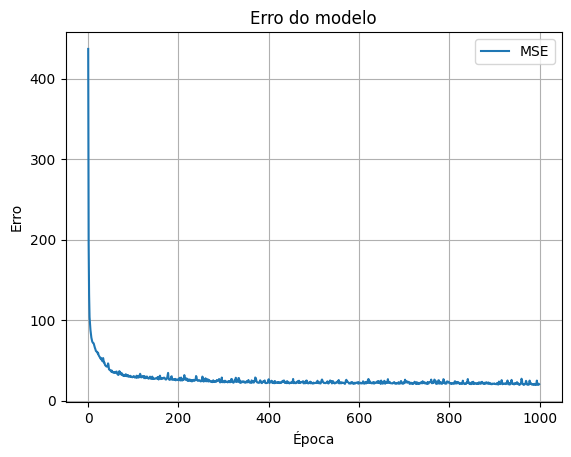

In [ ]:
plt.plot(history.history['loss'], label='MSE')
plt.title('Erro do modelo')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.grid()
plt.show()

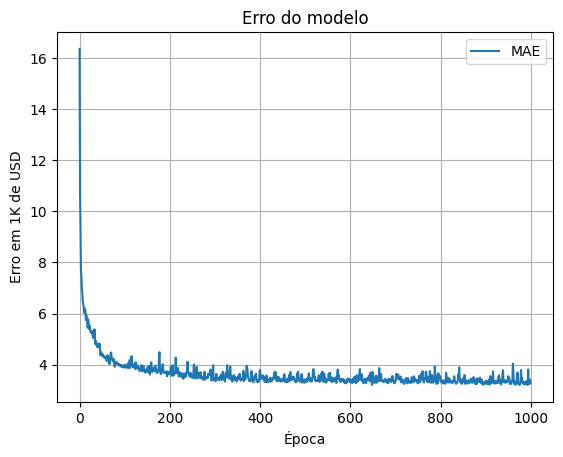

In [ ]:
plt.plot(history.history['mae'], label='MAE')
plt.title('Erro do modelo')
plt.ylabel('Erro em 1K de USD')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Testando o modelo treinado no conjunto de teste
### Medindo a capacidade de generalização



In [ ]:
test_eval = model.evaluate(x_test, y_test)

print ("MSE no conjunto de teste: {:.5}".format(test_eval[0]))
print ("MAE no conjunto de teste: {:.5}".format(test_eval[1]))

4/4 [==============================] - 0s 6ms/step - loss: 28.5786 - mae: 3.8395
MSE no conjunto de teste: 28.579
MAE no conjunto de teste: 3.8395


#### Comparando os 5 primeiros valores preditos com o esperados.

In [ ]:
y_hat = model.predict(x_test)

print(y_hat[:5]) # obtém as predições para as 5 primeiras amostras do conjunto de teste

4/4 [==============================] - 0s 3ms/step
[[11.34504 ]
 [16.035118]
 [19.986671]
 [30.910646]
 [23.253819]]


In [ ]:
print(y_test[:5]) # obtém os valores esperados para as 5 primeiras amostras

[ 7.2 18.8 19.  27.  22.2]


#### Comparando os histogramas dos valores preditos e esperados.

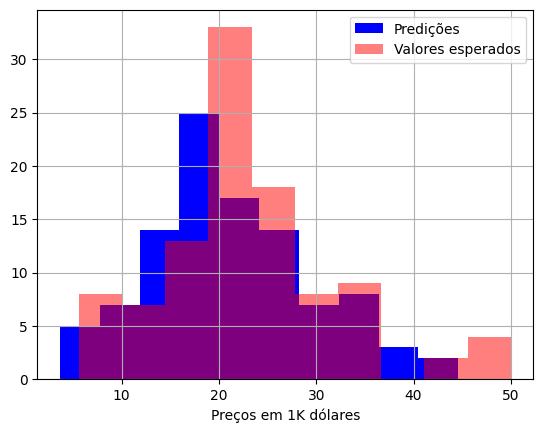

In [ ]:
plt.hist(y_hat, label='Predições', color = 'b')
plt.hist(y_test, label = 'Valores esperados', color = 'r', alpha=0.5)
plt.xlabel('Preços em 1K dólares')
plt.legend()
plt.grid()
plt.show()